In [7]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras.optimizers import SGD, Adam
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import numpy as np
import PIL
import keras

In [39]:
# VGG16 : 太容易过拟合 先不用
# top_model = Sequential()
# top_model.add(Flatten(input_shape=vgg16_model.output_shape[1:]))
# top_model.add(Dense(256,activation='relu'))
# top_model.add(Dropout(0.5))
# top_model.add(Dense(2,activation='softmax'))
# model = Sequential()
# vgg16_model = VGG16(weights='imagenet',include_top=False, input_shape=(256,256,3))
# model.add(vgg16_model)
# model.add(top_model)

#3层卷积
imgSize = 800  #图片尺寸
imgChan = 3    #3通道
kernelInit = 'uniform'  #卷积核初始化方式
nHiddenUnits = 50
maxpoolSize = (4,4)
nFilters = 130 #130 before 
kernelSize = (4,4)
inputStrides = 1
costFunction = 'categorical_crossentropy' #代价函数:不同于损失函数，代价函数在整个训练集上计算
early_stop_delta = 0.01 # 0.01 change or above is considered improvement
early_stop_patience = 10 

model=Sequential()

model.add(Conv2D(filters=nFilters, kernel_size = kernelSize ,strides= inputStrides,
                 input_shape=(imgSize,imgSize,3),kernel_initializer= kernelInit))
model.add(Activation('relu'))



model.add(MaxPooling2D(pool_size=maxpoolSize))


model.add(Conv2D(filters=nFilters, kernel_size = kernelSize ,strides= inputStrides,
                 kernel_initializer= kernelInit))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=maxpoolSize))


model.add(Conv2D(filters=nFilters, kernel_size = kernelSize ,strides= inputStrides,
                 kernel_initializer= kernelInit))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=maxpoolSize))

model.add(Flatten())
model.add(Dense(nHiddenUnits))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=early_stop_delta, patience=early_stop_patience, verbose=2, mode='auto')

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 797, 797, 130)     6370      
_________________________________________________________________
activation_21 (Activation)   (None, 797, 797, 130)     0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 199, 199, 130)     0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 196, 196, 130)     270530    
_________________________________________________________________
activation_22 (Activation)   (None, 196, 196, 130)     0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 49, 49, 130)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 46, 46, 130)      

In [40]:
#测试 ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range = 40,     # 随机旋转度数
    width_shift_range = 0.2, # 随机水平平移
    height_shift_range = 0.2,# 随机竖直平移
    rescale = 1/255,         # 数据归一化
    shear_range = 20,       # 随机错切变换
    zoom_range = 0.2,        # 随机放大
    horizontal_flip = True,  # 水平翻转
    fill_mode = 'nearest',   # 填充方式
)
test_datagen = ImageDataGenerator(
    rescale = 1/255,         # 数据归一化
)

validation_datagen = ImageDataGenerator(
    rescale = 1/255,)

In [41]:
batch_size = 5
# 生成训练数据
train_generator = train_datagen.flow_from_directory(
    '../../data/imgProcessed/training',
    target_size=(imgSize,imgSize),
    batch_size=batch_size,
    class_mode='binary',
    )

# 测试数据
test_generator = test_datagen.flow_from_directory(
    '../../data/imgProcessed/test',
    target_size=(imgSize,imgSize),
    batch_size=batch_size,
    class_mode='binary',
    )

#验证集
validation_generator = validation_datagen.flow_from_directory(
    '../../data/imgProcessed/validation',
    target_size=(imgSize,imgSize),
    batch_size=batch_size,
    class_mode='binary',
    )

Found 244 images belonging to 2 classes.
Found 107 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [42]:
train_generator.class_indices

{'m': 0, 's': 1}

In [43]:
#model.compile(optimizer=SGD(lr=1e-4,momentum=0.9),loss=costFunction,metrics=['categorical_accuracy'])
model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss="binary_crossentropy",metrics=['binary_accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 797, 797, 130)     6370      
_________________________________________________________________
activation_21 (Activation)   (None, 797, 797, 130)     0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 199, 199, 130)     0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 196, 196, 130)     270530    
_________________________________________________________________
activation_22 (Activation)   (None, 196, 196, 130)     0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 49, 49, 130)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 46, 46, 130)      

In [44]:
from PIL import Image
history = model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=validation_generator,validation_steps=len(validation_generator))

Epoch 1/5
49/49 [==============================] - 537s 11s/step - loss: 0.7108 - binary_accuracy: 0.4949 - val_loss: 0.6890 - val_binary_accuracy: 0.5833
Epoch 2/5
49/49 [==============================] - 511s 10s/step - loss: 0.7437 - binary_accuracy: 0.5908 - val_loss: 0.6929 - val_binary_accuracy: 0.5000
Epoch 3/5
49/49 [==============================] - 532s 11s/step - loss: 0.6884 - binary_accuracy: 0.5949 - val_loss: 0.6504 - val_binary_accuracy: 0.8958
Epoch 4/5
49/49 [==============================] - 524s 11s/step - loss: 0.6341 - binary_accuracy: 0.6653 - val_loss: 0.5256 - val_binary_accuracy: 0.8958
Epoch 5/5
49/49 [==============================] - 549s 11s/step - loss: 0.4792 - binary_accuracy: 0.8031 - val_loss: 0.0970 - val_binary_accuracy: 1.0000


In [45]:
model.save("../../model/Conv3_1024_4by4_Adam_epoch5.h5")

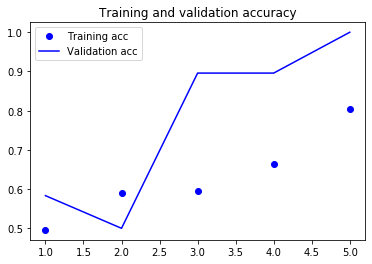

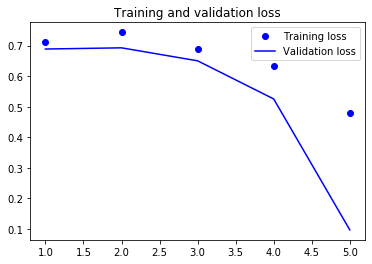

In [46]:
#画出结果
import matplotlib.pyplot as plt

#查看变量，发现history.history中就只有这四个值，分别是准确度，验证集准确度，损失，验证集损失
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#画两个图，分别是正确率和验证损失率
#正确率
plt.figure(1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('acc.png')
plt.show()
#损失
plt.figure(2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png')
plt.show()
